In [84]:
import numpy as np

np.random.seed(42)

# LeakyReLU slope
alpha = 0.01

# Initialize parameters
def initialize_parameters():
    W1 = np.random.randn(2, 3) * 0.01  # Weights for the first hidden layer
    b1 = np.zeros((1, 3))              # Biases for the first hidden layer
    W2 = np.random.randn(3, 3) * 0.01  # Weights for the second hidden layer
    b2 = np.zeros((1, 3))              # Biases for the second hidden layer
    W3 = np.random.randn(3, 1) * 0.01  # Weights for the output layer
    b3 = np.zeros((1, 1))              # Biases for the output layer
    
    return W1, b1, W2, b2, W3, b3


In [85]:
# LeakyReLU activation function
def leaky_relu(Z):
    return np.where(Z > 0, Z, alpha * Z)


def leaky_relu_derivative(Z):
    return np.where(Z > 0, 1, alpha)

# Sigmoid activation function
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

# Derivative of Sigmoid
def sigmoid_derivative(A):
    return A * (1 - A)


In [87]:
# Forward propagation
def forward_propagation(X, W1, b1, W2, b2, W3, b3):
    # First hidden layer
    Z1 = np.dot(X, W1) + b1
    A1 = leaky_relu(Z1)
    
    # Second hidden layer
    Z2 = np.dot(A1, W2) + b2
    A2 = leaky_relu(Z2)
    
    # Output layer
    Z3 = np.dot(A2, W3) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache


In [88]:
# Binary Cross-Entropy Loss function
def compute_loss(Y, A3):
    m = Y.shape[0]
    loss = -1/m * np.sum(Y * np.log(A3) + (1 - Y) * np.log(1 - A3))
    return loss


In [89]:
# Backward propagation
def backward_propagation(X, Y, cache):
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    m = X.shape[0]
    
    # Output layer gradients
    dZ3 = A3 - Y
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m
    
    # Second hidden layer gradients
    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * leaky_relu_derivative(Z2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    # First hidden layer gradients
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * leaky_relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    gradients = (dW1, db1, dW2, db2, dW3, db3)
    
    return gradients


In [90]:
# Update parameters
def update_parameters(W1, b1, W2, b2, W3, b3, gradients, learning_rate):
    dW1, db1, dW2, db2, dW3, db3 = gradients
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    
    return W1, b1, W2, b2, W3, b3


In [91]:
# Training the neural network
def train(X, Y, learning_rate, epochs):
    
    W1, b1, W2, b2, W3, b3 = initialize_parameters()
    
    # Training loop
    for i in range(epochs):
        # Forward propagation
        A3, cache = forward_propagation(X, W1, b1, W2, b2, W3, b3)
        
        # Compute loss
        loss = compute_loss(Y, A3)
        
        
        gradients = backward_propagation(X, Y, cache)
        
        # Update parameters
        W1, b1, W2, b2, W3, b3 = update_parameters(W1, b1, W2, b2, W3, b3, gradients, learning_rate)
        
       
        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss}")
    
    return W1, b1, W2, b2, W3, b3


In [92]:
# Evaluate the model
def predict(X, W1, b1, W2, b2, W3, b3):
    A3, _ = forward_propagation(X, W1, b1, W2, b2, W3, b3)
    predictions = A3 > 0.5
    return predictions


In [96]:
# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

W1, b1, W2, b2, W3, b3 = train(X, Y, learning_rate=0.3, epochs=5000)

# Predict on the training data
predictions = predict(X, W1, b1, W2, b2, W3, b3)
print("Predictions:")
print(predictions)


Epoch 0, Loss: 0.6931471526434245
Epoch 100, Loss: 0.6931471217294013
Epoch 200, Loss: 0.6931470887913481
Epoch 300, Loss: 0.6931470527994834
Epoch 400, Loss: 0.6931470158494979
Epoch 500, Loss: 0.693146978153776
Epoch 600, Loss: 0.6931469416922685
Epoch 700, Loss: 0.6931469000745236
Epoch 800, Loss: 0.6931468520542392
Epoch 900, Loss: 0.6931467960505592
Epoch 1000, Loss: 0.6931467300319811
Epoch 1100, Loss: 0.6931466522413835
Epoch 1200, Loss: 0.6931465561967959
Epoch 1300, Loss: 0.6931464387546438
Epoch 1400, Loss: 0.6931462933615935
Epoch 1500, Loss: 0.6931461109270728
Epoch 1600, Loss: 0.6931458785941167
Epoch 1700, Loss: 0.6931455777807989
Epoch 1800, Loss: 0.6931451809667135
Epoch 1900, Loss: 0.6931446462424655
Epoch 2000, Loss: 0.6931439077065887
Epoch 2100, Loss: 0.6931428577842291
Epoch 2200, Loss: 0.6931413129461669
Epoch 2300, Loss: 0.6931389463699429
Epoch 2400, Loss: 0.693135197119167
Epoch 2500, Loss: 0.6931287762306597
Epoch 2600, Loss: 0.6931168421420981
Epoch 2700, Los

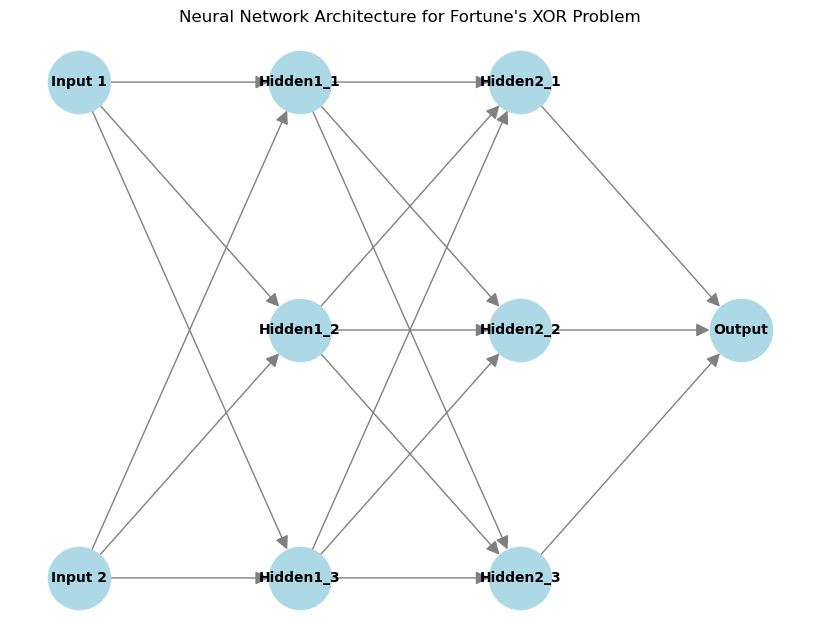

In [99]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph()


# Input Layer
G.add_node("Input 1", layer=0, pos=(0, 3))
G.add_node("Input 2", layer=0, pos=(0, 1))

# First Hidden Layer
for i in range(1, 4):
    G.add_node(f"Hidden1_{i}", layer=1, pos=(1, 4-i))

# Second Hidden Layer
for i in range(1, 4):
    G.add_node(f"Hidden2_{i}", layer=2, pos=(2, 4-i))

# Output Layer
G.add_node("Output", layer=3, pos=(3, 2))


# From Input to First Hidden Layer
for input_node in ["Input 1", "Input 2"]:
    for hidden1_node in [f"Hidden1_{i}" for i in range(1, 4)]:
        G.add_edge(input_node, hidden1_node)

# From First Hidden Layer to Second Hidden Layer
for hidden1_node in [f"Hidden1_{i}" for i in range(1, 4)]:
    for hidden2_node in [f"Hidden2_{i}" for i in range(1, 4)]:
        G.add_edge(hidden1_node, hidden2_node)

# From Second Hidden Layer to Output Layer
for hidden2_node in [f"Hidden2_{i}" for i in range(1, 4)]:
    G.add_edge(hidden2_node, "Output")

# Extract positions
pos = nx.get_node_attributes(G, 'pos')


plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, 
        node_size=2000, 
        node_color='lightblue', 
        font_size=10, 
        font_weight='bold', 
        edge_color='gray', 
        arrowsize=20)
plt.title("Neural Network Architecture for Fortunes XOR Problem")
plt.show()
